<a href="https://colab.research.google.com/github/e-junior/PosTech-Phasis-2/blob/main/indice_ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Tratamento dos dados

In [170]:
df_ibov = pd.read_csv('ibov_index.csv')

In [171]:
df_ibov.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,11.03.2025,123.507,124.519,124.625,122.636,"8,81B","-0,81%"
1,10.03.2025,124.519,125.031,125.031,123.471,"9,37B","-0,41%"
2,07.03.2025,125.035,123.357,125.822,122.530,"9,98B","1,36%"
3,06.03.2025,123.358,123.048,124.112,122.681,"10,06B","0,25%"
4,05.03.2025,123.047,122.799,123.364,122.747,"9,60B","0,20%"


In [172]:
df_ibov.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
6486,07.01.2000,16.309,16.125,16.449,16.125,"633,18M","1,25%"
6487,06.01.2000,16.107,16.237,16.499,15.977,"105,25M","-0,85%"
6488,05.01.2000,16.245,15.871,16.302,15.350,"112,10M","2,49%"
6489,04.01.2000,15.851,16.908,16.908,15.851,"102,42M","-6,37%"
6490,03.01.2000,16.930,17.098,17.408,16.719,"777,29M","-0,95%"


In [173]:
df_ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6491 entries, 0 to 6490
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      6491 non-null   object 
 1   Último    6491 non-null   float64
 2   Abertura  6491 non-null   float64
 3   Máxima    6491 non-null   float64
 4   Mínima    6491 non-null   float64
 5   Vol.      6490 non-null   object 
 6   Var%      6491 non-null   object 
dtypes: float64(4), object(3)
memory usage: 355.1+ KB


In [174]:
# renomeando colunas

df_ibov.rename(columns={'Data':'data', 'Último': 'ultimo', 'Abertura' : 'abertura', 'Máxima': 'maxima', 'Mínima' : 'minima', 'Vol.': 'vol', 'Var%': 'variacao'}, inplace=True)

In [175]:
# convertendo coluna data em objeto para datetime

df_ibov['data'] = pd.to_datetime(df_ibov['data'], dayfirst=True, errors='coerce')

#ainda nao sei se consigo fazer operações de data com esse formato

In [176]:
#convertendo valores de coluna vol para float

def convert_volume(vol_str):
    vol_str = str(vol_str) # Convert to string to handle non-string values
    vol_str = vol_str.replace(',', '.')
    if 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    elif 'K' in vol_str:
        return float(vol_str.replace('K', '')) * 1_000
    else:
        try:
            return float(vol_str)
        except ValueError:
            return np.nan # Handle cases that cannot be converted to float


df_ibov['vol'] = df_ibov['vol'].apply(convert_volume)

In [177]:
#convertendo valores de coluna variacao para float centesimal

def convert_variacao(variacao_str):
    variacao_str = variacao_str.replace(',', '.')
    if '%' in variacao_str:
        return float(variacao_str.replace('%', '')) / 100
    else:
        return float(variacao_str) / 100

df_ibov['variacao'] = df_ibov['variacao'].apply(convert_variacao)

In [178]:
def convert_system (df_ibov, lista_colunas):
  for coluna in lista_colunas:
   df_ibov[coluna] = df_ibov[coluna]*1000
  return df_ibov


In [179]:
convert_system(df_ibov, ('abertura', 'maxima', 'minima', 'ultimo'))

,data,ultimo,abertura,maxima,minima,vol,variacao
0,2025-03-11,123507.0,124519.0,124625.0,122636.0,8.810000e+09,-0.0081
1,2025-03-10,124519.0,125031.0,125031.0,123471.0,9.370000e+09,-0.0041
2,2025-03-07,125035.0,123357.0,125822.0,122530.0,9.980000e+09,0.0136
3,2025-03-06,123358.0,123048.0,124112.0,122681.0,1.006000e+10,0.0025
4,2025-03-05,123047.0,122799.0,123364.0,122747.0,9.600000e+09,0.0020
...,...,...,...,...,...,...,...
6486,2000-01-07,16309.0,16125.0,16449.0,16125.0,6.331800e+08,0.0125
6487,2000-01-06,16107.0,16237.0,16499.0,15977.0,1.052500e+08,-0.0085
6488,2000-01-05,16245.0,15871.0,16302.0,15350.0,1.121000e+08,0.0249
6489,2000-01-04,15851.0,16908.0,16908.0,15851.0,1.024200e+08,-0.0637


In [180]:
#criando coluna de diferença absoluta entre abertura e fechamento diário (delta)
df_ibov['delta'] = df_ibov['abertura'] - df_ibov['ultimo']

#EDA simples

In [181]:
df_ibov.describe()

,data,ultimo,abertura,maxima,minima,vol,variacao,delta
count,6491,6491.000000,6491.000000,6491.000000,6491.000000,6.490000e+03,6491.000000,6491.000000
mean,2012-04-28 20:20:48.990910464,60033.285780,60017.041442,60601.765830,59439.653520,1.460671e+08,0.000490,-16.244338
min,2000-01-03 00:00:00,8371.000000,8397.000000,8513.000000,8225.000000,1.121000e+05,-0.147800,-10057.000000
25%,2005-10-05 00:00:00,29926.500000,29858.500000,30252.000000,29368.000000,3.260000e+06,-0.008700,-461.000000
50%,2012-02-02 00:00:00,55974.000000,55966.000000,56562.000000,55345.000000,8.335000e+06,0.000700,-25.000000
75%,2018-08-25 12:00:00,82753.000000,82728.500000,83657.000000,81354.000000,1.181200e+08,0.010150,406.500000
max,2025-03-11 00:00:00,137344.000000,137349.000000,137469.000000,136664.000000,2.487000e+10,0.146600,12520.000000
std,NaN,34765.687825,34760.849422,34999.671374,34523.650044,8.809087e+08,0.017151,999.976520


In [182]:
# lineplot, boxplots, scatterplots, algumas correlações e leituras a fazer...

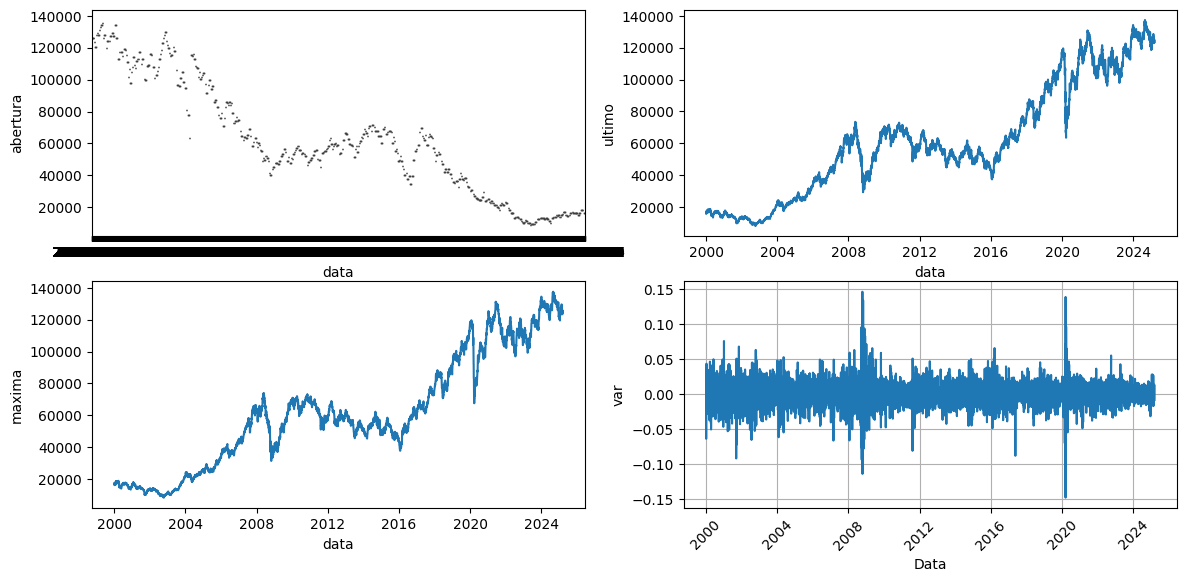

In [183]:
plt.figure(figsize=(14,10))
plt.subplot(3,2,1)
sns.boxplot(data=df_ibov, x='data', y='abertura')
plt.subplot(3,2,2)
sns.lineplot(data=df_ibov, x='data', y='ultimo')
plt.subplot(3,2,3)
sns.lineplot(data=df_ibov, x='data', y='maxima')
plt.subplot(3,2,4)
sns.lineplot(data=df_ibov, x='data', y='variacao')
plt.grid()
plt.title('')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.ylabel('var')
plt.show()

In [184]:
# variavel delta (diferenca entre abertura e fechamento do dia anterior)

df_ibov['delta'] =   df_ibov['ultimo'] - df_ibov['abertura']


#trazendo matriz de correlação

correlações aparentes se encontram entre as variaveis minima, maxima, abertura e fechamento(ultimo)

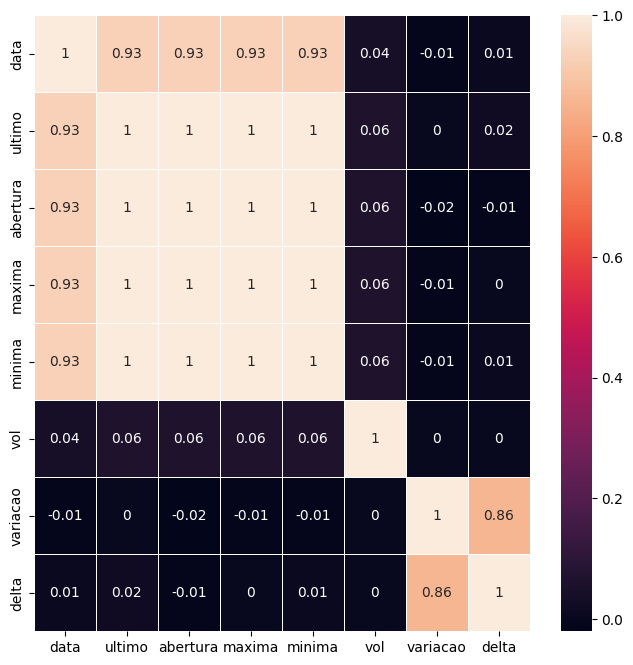

In [185]:

correlation_matrix = df_ibov.corr().round(2)

fig, ax= plt.subplots(figsize=(8,8))

sns.heatmap(correlation_matrix, annot=True, linewidths=.5)

plt.show()


In [186]:
df_ibov.head(200)

,data,ultimo,abertura,maxima,minima,vol,variacao,delta
0,2025-03-11,123507.0,124519.0,124625.0,122636.0,8.810000e+09,-0.0081,-1012.0
1,2025-03-10,124519.0,125031.0,125031.0,123471.0,9.370000e+09,-0.0041,-512.0
2,2025-03-07,125035.0,123357.0,125822.0,122530.0,9.980000e+09,0.0136,1678.0
3,2025-03-06,123358.0,123048.0,124112.0,122681.0,1.006000e+10,0.0025,310.0
4,2025-03-05,123047.0,122799.0,123364.0,122747.0,9.600000e+09,0.0020,248.0
...,...,...,...,...,...,...,...,...
195,2024-05-29,122707.0,123780.0,123780.0,122458.0,8.260000e+06,-0.0087,-1073.0
196,2024-05-28,123780.0,124498.0,125392.0,123537.0,9.180000e+06,-0.0058,-718.0
197,2024-05-27,124496.0,124297.0,124535.0,124081.0,4.330000e+06,0.0015,199.0
198,2024-05-24,124306.0,124731.0,125257.0,124259.0,9.210000e+06,-0.0034,-425.0


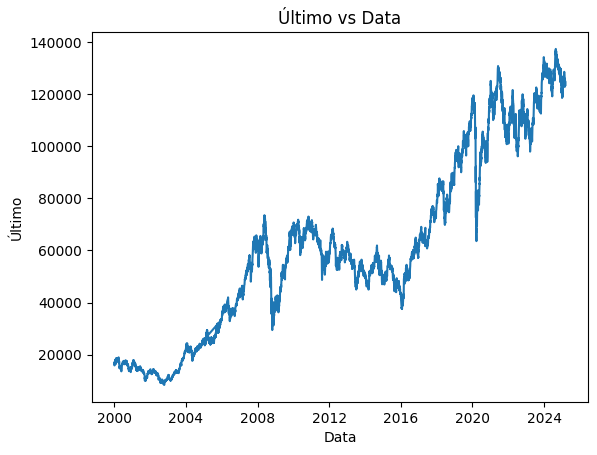

In [187]:
plt.plot(df_ibov['data'], df_ibov['ultimo'])
plt.xlabel('Data')
plt.ylabel('Último')
plt.title('Último vs Data')
plt.show()

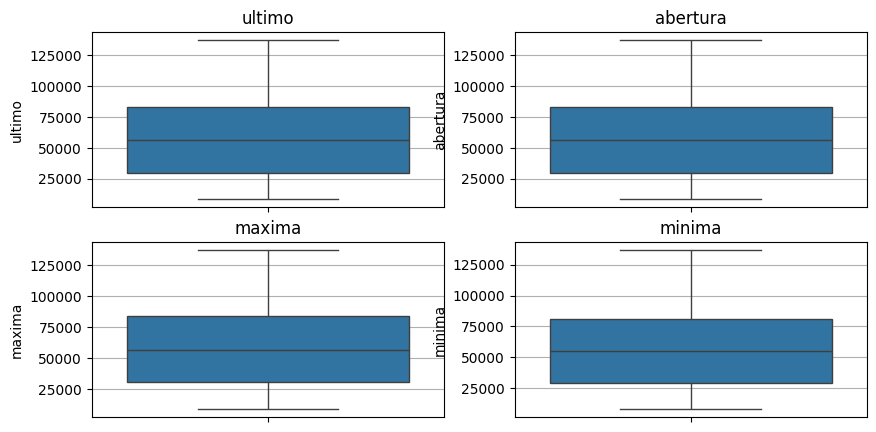

In [188]:
#boxplot para variaveis que apresentam correlação

plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.grid()
sns.boxplot(df_ibov['ultimo'])
plt.title('ultimo')
plt.subplot(2,2,2)
plt.grid()
sns.boxplot(df_ibov['abertura'])
plt.title('abertura')
plt.subplot(2,2,3)
plt.grid()
sns.boxplot(df_ibov['maxima'])
plt.title('maxima')
plt.subplot(2,2,4)
plt.grid()
sns.boxplot(df_ibov['minima'])
plt.title('minima')

plt.show()

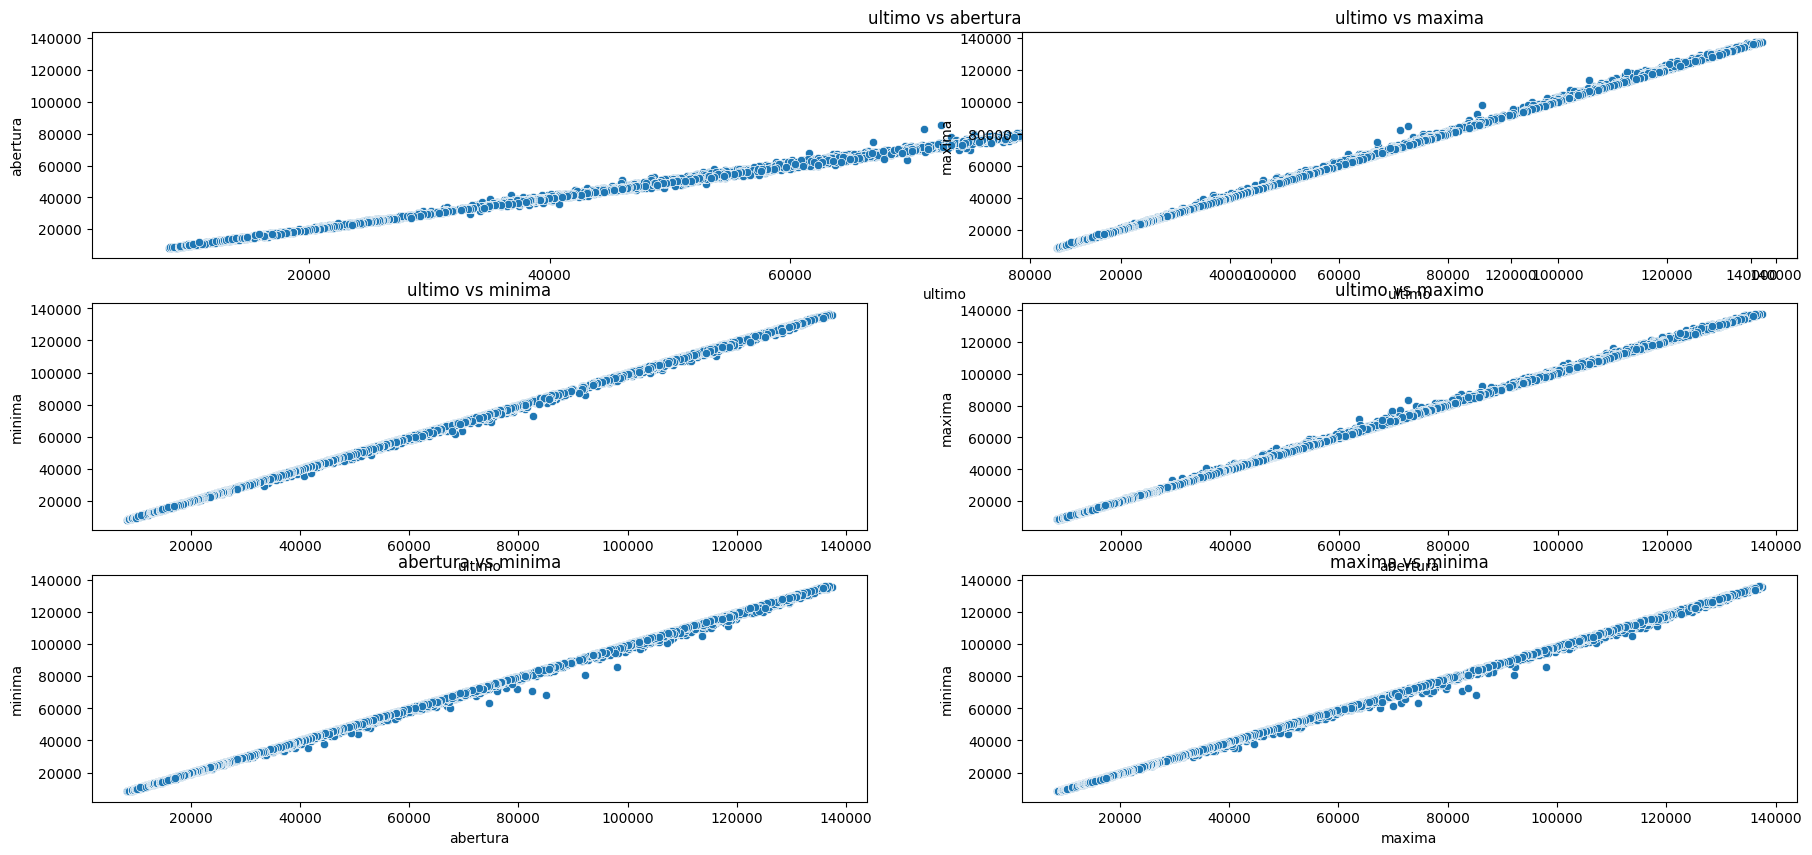

In [189]:
# scatterplot
plt.figure(figsize=(22,10))
plt.subplot(3,1,1)
sns.scatterplot(data=df_ibov,  x='ultimo', y='abertura')
plt.title('ultimo vs abertura')
plt.subplot(3,2,2)
sns.scatterplot(data=df_ibov,  x='ultimo', y='maxima')
plt.title('ultimo vs maxima')
plt.subplot(3,2,3)
sns.scatterplot(data=df_ibov,  x='ultimo', y='minima')
plt.title('ultimo vs minima')
plt.subplot(3,2,4)
sns.scatterplot(data=df_ibov,  x='abertura', y='maxima')
plt.title('ultimo vs maximo')
plt.subplot(3,2,5)
sns.scatterplot(data=df_ibov,  x='abertura', y='minima')
plt.title('abertura vs minima')
plt.subplot(3,2,6)
sns.scatterplot(data=df_ibov,  x='maxima', y='minima')
plt.title('maxima vs minima')


plt.show()